In [31]:
import numpy as np
import matplotlib.pyplot as plt
import json
import math

In [32]:
n, k, seed = 500, 30, 0 

In [33]:
# Binning method
from math import ceil
result_binning = {}
for degree in [2, 3, 4, 5, 10, 20]:
    found = 0
    not_found = 0
    print("degree=", degree)
    result_binning[degree] = []
    for C in [0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 3.0]:
        for ratio in [1.1, 1.6, 3.0]:
            cs_bins_range = np.linspace(0.2 * degree ** 2 if degree < 10 else 0.05 * degree ** 2,
                                        degree ** 2 if degree < 10 else 0.5 * degree ** 2, 10)
            cs_bins_range = [ceil(a) for a in cs_bins_range]
            for cs_bins in cs_bins_range:
                for cs_iterations in [1, 2, 3]:
                    for cs_ratio in [1.1, 1.3, 1.5, 1.9, 2.1, 3.0]:
                        path = f"../results_synthetic/binning/n={n}_k={k}_degree={degree}_C={C:.3}_ratio={ratio:.3}_csbins={cs_bins}_csiterations={cs_iterations}_csratio={cs_ratio}_seed={seed}.json"
                        try:
                            f = open(path)
                            found += 1 
                            data = json.loads(f.read())
                            # print(data)
                            normalized_mse = data["mse"]/data['true_fourier_norm_squared']
                            if normalized_mse < 0.1:
                                result_binning[degree].append((data["measurements"], normalized_mse*100 , data["C"], data["ratio"], data["cs_bins"], data["cs_iteraions"], data["cs_ratio"]))
                                #if data["equality"]==True:
                            #    result_binning[degree].append(data["measurements"])
                        except:
                            not_found+=1
                            # print(f"Could not find {path}")
                            #        f"C={C:.3}_ratio={ratio:.3}_csbins={cs_bins}_csiterations={cs_iterations}_"
                            #        f"csratio={cs_ratio}.json")
    print(f"found {found}, not found {not_found}")


degree= 2
found 5724, not found 1842
degree= 3
found 6804, not found 758
degree= 4
found 7344, not found 216
degree= 5
found 7452, not found 108
degree= 10
found 7487, not found 73
degree= 20
found 7560, not found 0


In [34]:
result_reed_solomon = {}
for degree in [2, 3, 4, 5, 10, 20]:
    print(degree)
    found, not_found = 0, 0
    result_reed_solomon[degree] = []
    for C in [0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 3.0]:
        for ratio in [1.1, 1.6, 3.0]:
            path = f"../results_synthetic/reed_solomon_synthetic/n={n}_k={k}_degree={degree}_C={C:.3}_ratio={ratio:.3}.json"
            try:
                f =open(path)
                found +=1
                data = json.loads(f.read())
                normalized_mse = data["mse"]/data['true_fourier_norm_squared']
                if normalized_mse < 0.1:
                    result_reed_solomon[degree].append((data["measurements"], normalized_mse*100))
            except:
                not_found+=1
                #bprint(f"Could not find {path}")
    print(found, not_found)

2
42 0
3
42 0
4
42 0
5
42 0
10
42 0
20
42 0


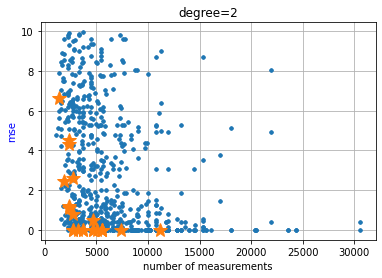

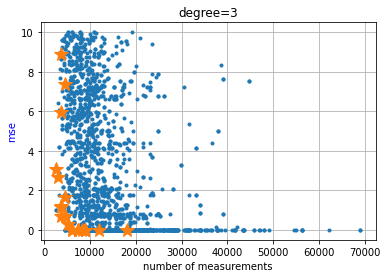

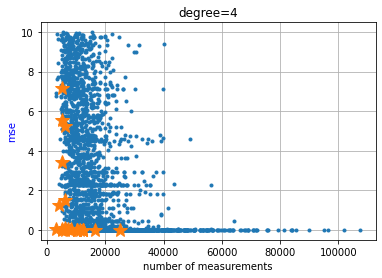

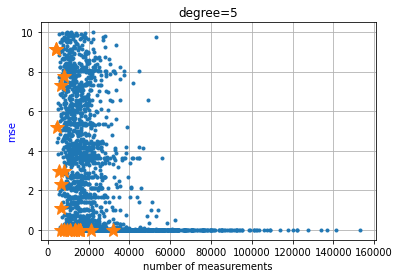

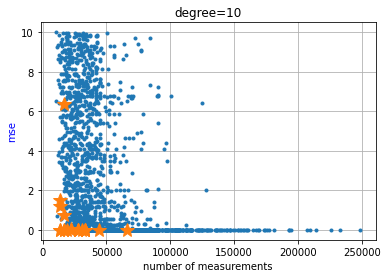

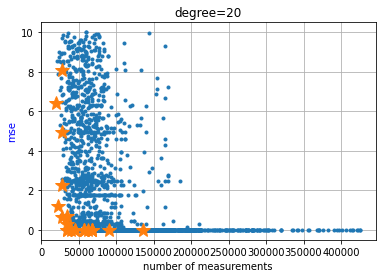

In [6]:
for degree in [2, 3, 4, 5, 10, 20]:  
    fig, ax = plt.subplots()
    ax.set_ylabel("mse", color="blue")
    ax.set_xlabel("number of measurements")
    ax.plot([a[0] for a in result_binning[degree]],[a[1] for a in result_binning[degree]],'.')
    ax.plot([a[0] for a in result_reed_solomon[degree]],[a[1] for a in result_reed_solomon[degree]],'*', markersize=15)
    ax.xaxis.grid()
    ax.yaxis.grid()
    ax.set_title(f"degree={degree}")
    plt.savefig(f"plots/reed_solomon/superconduct-n={n}_d={degree}", dpi=300)
    plt.show()


In [7]:
# Random measurement method
from math import ceil
result_random = {}
for degree in [2,3,4,5]:
    print(degree)
    result_random[degree] = []
    found, not_found = 0, 0
    for C in [0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 3.0, 4.0]:
        for ratio in [1.1, 1.6, 3.0]:
            for sampling_factor in list(np.linspace(0.2, 2.0, 10)) + list(np.linspace(2, 6, 10)):
                dir_string=f"../results_synthetic/random_parallel/n={n}_k={k}_degree={degree}_C={C:.3}_ratio={ratio:.3}_samplefactor={sampling_factor:.3}_seed={seed}.json"
                try:
                    f =open(dir_string)
                    found += 1
                    data = json.loads(f.read())
                    print(data)
                    normalized_mse = data["mse"]/data['true_fourier_norm_squared']
                    if normalized_mse < 0.1:
                        result_random[degree].append((data["measurements"], normalized_mse*100, data["C"], data["ratio"], data["sampling_factor"]))
                    
                    #if data["equality"]==True:
                    #    result_random[degree].append(data["measurements"])
                except:
                    not_found += 1
                    print(f" Couldn't find {dir_string}")
    print(found, not_found)

2
{'n': 500, 'k': 30, 'degree': 2, 'C': 0.05, 'ratio': 1.1, 'sampling_factor': 0.2, 'n_cores': 10, 'wait_time': 100, 'time_uncached': 3.2901763916015625e-05, 'time_cached': 1.239776611328125e-05, 'equality': False, 'mse': 85352, 'true_fourier_norm_squared': 85352, 'computed_fourier_norm_squared': 0, 'measurements': 0}
{'n': 500, 'k': 30, 'degree': 2, 'C': 0.05, 'ratio': 1.1, 'sampling_factor': 0.4, 'n_cores': 10, 'wait_time': 100, 'time_uncached': 0.00010943412780761719, 'time_cached': 1.5735626220703125e-05, 'equality': False, 'mse': 88652, 'true_fourier_norm_squared': 88652, 'computed_fourier_norm_squared': 0, 'measurements': 0}
{'n': 500, 'k': 30, 'degree': 2, 'C': 0.05, 'ratio': 1.1, 'sampling_factor': 0.6000000000000001, 'n_cores': 10, 'wait_time': 100, 'time_uncached': 4.267692565917969e-05, 'time_cached': 1.5974044799804688e-05, 'equality': False, 'mse': 85352, 'true_fourier_norm_squared': 85352, 'computed_fourier_norm_squared': 0, 'measurements': 0}
{'n': 500, 'k': 30, 'degree'

{'n': 500, 'k': 30, 'degree': 3, 'C': 3.0, 'ratio': 1.1, 'sampling_factor': 1.0, 'n_cores': 10, 'wait_time': 100, 'time_uncached': 176.53108859062195, 'time_cached': 135.69581770896912, 'equality': True, 'mse': 0.0, 'true_fourier_norm_squared': 124915, 'computed_fourier_norm_squared': 124915.0, 'measurements': 19968}
{'n': 500, 'k': 30, 'degree': 3, 'C': 3.0, 'ratio': 1.1, 'sampling_factor': 1.2, 'n_cores': 10, 'wait_time': 100, 'time_uncached': 208.54759550094604, 'time_cached': 138.092294216156, 'equality': True, 'mse': 0.0, 'true_fourier_norm_squared': 124915, 'computed_fourier_norm_squared': 124915.0, 'measurements': 23808}
{'n': 500, 'k': 30, 'degree': 3, 'C': 3.0, 'ratio': 1.1, 'sampling_factor': 1.4000000000000001, 'n_cores': 10, 'wait_time': 100, 'time_uncached': 238.0998182296753, 'time_cached': 137.60010862350464, 'equality': True, 'mse': 0.0, 'true_fourier_norm_squared': 124915, 'computed_fourier_norm_squared': 124915.0, 'measurements': 27648}
{'n': 500, 'k': 30, 'degree': 3

{'n': 500, 'k': 30, 'degree': 5, 'C': 0.4, 'ratio': 1.6, 'sampling_factor': 2.0, 'n_cores': 10, 'wait_time': 1000, 'time_uncached': 11110.738864660263, 'time_cached': 11094.444625139236, 'equality': False, 'mse': 49692.0, 'true_fourier_norm_squared': 105143, 'computed_fourier_norm_squared': 65523.0, 'measurements': 4960}
{'n': 500, 'k': 30, 'degree': 5, 'C': 0.4, 'ratio': 1.6, 'sampling_factor': 2.0, 'n_cores': 10, 'wait_time': 1000, 'time_uncached': 11110.738864660263, 'time_cached': 11094.444625139236, 'equality': False, 'mse': 49692.0, 'true_fourier_norm_squared': 105143, 'computed_fourier_norm_squared': 65523.0, 'measurements': 4960}
 Couldn't find ../results_synthetic/random_parallel/n=500_k=30_degree=5_C=0.4_ratio=1.6_samplefactor=2.44_seed=0.json
 Couldn't find ../results_synthetic/random_parallel/n=500_k=30_degree=5_C=0.4_ratio=1.6_samplefactor=2.89_seed=0.json
 Couldn't find ../results_synthetic/random_parallel/n=500_k=30_degree=5_C=0.4_ratio=1.6_samplefactor=3.33_seed=0.json


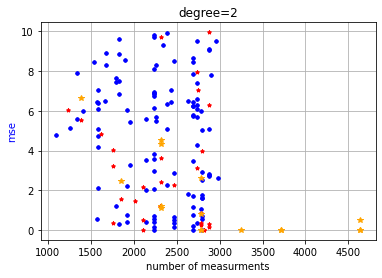

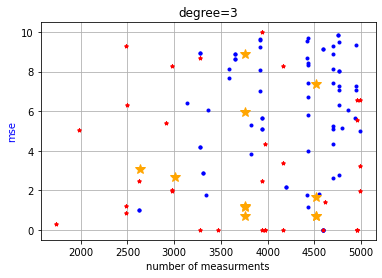

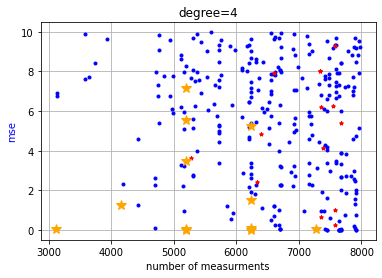

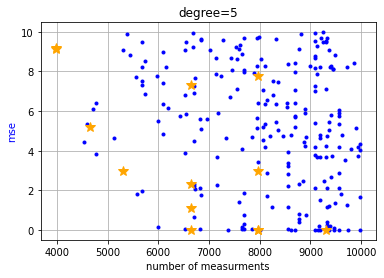

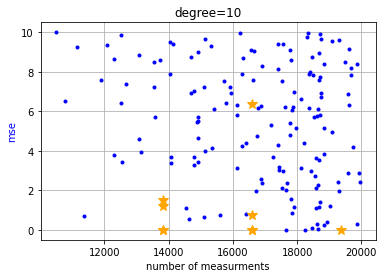

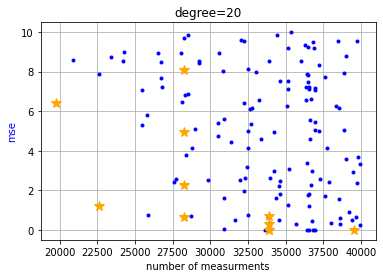

In [8]:
for degree in [2,3,4,5,10,20]:
    fig, ax = plt.subplots()
    ax.set_ylabel("mse", color="blue")
    ax.set_xlabel("number of measurments")
    if degree == 2: 
        ax.plot([a[0] for a in result_binning[degree] if a[0]<3000],[a[1] for a in result_binning[degree] if a[0]<3000],'b.')
        ax.plot([a[0] for a in result_random[degree] if a[0]<3000],[a[1] for a in result_random[degree] if a[0]<3000],'r*', markersize=4)
        ax.plot([a[0] for a in result_reed_solomon[degree] if a[0]<5000],[a[1] for a in result_reed_solomon[degree] if a[0]<5000],'*', color="#FFA500")
    if degree == 3:
        ax.plot([a[0] for a in result_binning[degree] if a[0]<5000],[a[1] for a in result_binning[degree] if a[0]<5000],'b.')
        ax.plot([a[0] for a in result_random[degree] if a[0]<5000],[a[1] for a in result_random[degree] if a[0]<5000],'r*', markersize=4)
        ax.plot([a[0] for a in result_reed_solomon[degree] if a[0]<5000],[a[1] for a in result_reed_solomon[degree] if a[0]<5000],'*', color="#FFA500", markersize=10)
    
    if degree == 4:
        ax.plot([a[0] for a in result_binning[degree] if a[0]<8000],[a[1] for a in result_binning[degree] if a[0]<8000],'b.')
        ax.plot([a[0] for a in result_random[degree] if a[0]<8000],[a[1] for a in result_random[degree] if a[0]<8000],'r*', markersize=4)
        ax.plot([a[0] for a in result_reed_solomon[degree] if a[0]<8000],[a[1] for a in result_reed_solomon[degree] if a[0]<8000],'*', color="#FFA500", markersize=10)
    
    if degree ==5:
        ax.plot([a[0] for a in result_binning[degree] if a[0]<10000],[a[1] for a in result_binning[degree] if a[0]<10000],'b.')
        ax.plot([a[0] for a in result_reed_solomon[degree] if a[0]<10000],[a[1] for a in result_reed_solomon[degree] if a[0]<10000],'*', color="#FFA500", markersize=10)
    
    if degree ==10:
        ax.plot([a[0] for a in result_binning[degree] if a[0]<20000],[a[1] for a in result_binning[degree] if a[0]<20000],'b.')
        ax.plot([a[0] for a in result_reed_solomon[degree] if a[0]<20000],[a[1] for a in result_reed_solomon[degree] if a[0]<20000],'*', color="#FFA500", markersize=10)
    
    if degree ==20:
        ax.plot([a[0] for a in result_binning[degree] if a[0]<40000],[a[1] for a in result_binning[degree] if a[0]<40000],'b.')
        ax.plot([a[0] for a in result_reed_solomon[degree] if a[0]<40000],[a[1] for a in result_reed_solomon[degree] if a[0]<40000],'*', color="#FFA500", markersize=10)
    
    # ax.plot([a[0] for a in result_reed_solomon[depth]],[a[1] for a in result_reed_solomon[depth]],'g*', markersize=4)
    ax.xaxis.grid()
    ax.yaxis.grid()
    ax.set_title(f"degree={degree}")
    #plt.savefig(f"images/random/n={n}_d={degree}", dpi=300)
    plt.show()

In [12]:
a = sorted(result_random[4])
print(a)

[(5280, 3.647156074775663, 0.6, 1.1, 1.0), (6336, 2.397243220094216, 0.8, 1.1, 1.0), (6400, 4.8393040325873695, 1.8, 1.6, 0.6000000000000001), (6608, 7.938689533598255, 0.6, 1.6, 1.8), (7336, 8.021353092911848, 0.6, 1.6, 2.0), (7336, 8.021353092911848, 0.6, 1.6, 2.0), (7360, 0.6324260260738793, 1.0, 1.6, 1.4000000000000001), (7360, 6.186819644048722, 1.4, 3.0, 1.4000000000000001), (7392, 4.124214447199896, 1.2, 1.6, 1.0), (7552, 6.275458882348841, 0.8, 1.6, 1.8), (7584, 0.22408796199468164, 1.8, 3.0, 1.2), (7584, 1.004910016233928, 0.8, 1.1, 1.2), (7584, 9.302140289023674, 2.0, 3.0, 1.2), (7680, 5.380102980867868, 2.0, 1.1, 0.6000000000000001), (8400, 1.7409144780742378, 1.0, 1.6, 1.6), (8400, 3.140219307418805, 0.6, 1.1, 1.6), (8448, 1.261864212654496, 1.4, 1.6, 1.0), (8832, 5.475713844652265, 0.8, 1.1, 1.4000000000000001), (9440, 0.8156801816606413, 0.6, 1.1, 1.8), (9440, 0.8634856135528399, 1.0, 1.6, 1.8), (9440, 8.092065294252393, 1.4, 3.0, 1.8), (10080, 3.1432071469120677, 1.8, 3.

In [13]:
a = sorted(result_binning[4])
print(a)

[(3136, 6.74790003111065, 1.0, 3.0, 9, 1, 2.1), (3136, 6.917971585606139, 0.6, 1.6, 7, 1, 2.1), (3584, 7.628331432126931, 0.8, 1.6, 7, 1, 1.9), (3584, 9.8786684641709, 0.8, 1.6, 7, 1, 3.0), (3648, 7.712330187700924, 0.6, 1.6, 9, 1, 1.5), (3744, 8.439282381001762, 1.0, 3.0, 11, 1, 1.1), (3936, 9.627709219122679, 0.8, 1.1, 5, 1, 1.5), (4192, 2.3374468526392205, 0.8, 1.6, 9, 1, 1.5), (4432, 1.234055791766048, 0.6, 1.1, 7, 1, 1.1), (4432, 4.575339624598154, 1.0, 1.6, 7, 1, 1.3), (4696, 0.10370216737529815, 0.6, 1.6, 12, 1, 1.3), (4696, 2.2710774655190296, 0.6, 1.6, 12, 1, 1.5), (4696, 2.6039614227937364, 0.6, 1.6, 12, 1, 1.9), (4720, 7.980918801202945, 0.8, 1.6, 7, 2, 3.0), (4752, 6.749974074458157, 1.0, 1.6, 5, 2, 1.9), (4752, 7.311002799958518, 1.0, 3.0, 15, 1, 1.5), (4768, 5.400808876905527, 1.0, 1.6, 8, 1, 1.9), (4768, 9.077050710359845, 1.0, 1.6, 8, 1, 1.3), (4768, 9.856891009022089, 0.6, 1.1, 8, 1, 1.3), (4848, 7.754848076324795, 0.6, 1.6, 8, 2, 2.1), (4944, 6.738566836046873, 0.4, 1

In [16]:
a = sorted(result_reed_solomon[4])
print(a)

[(3120, 0.051851083687649076), (4160, 1.2568702685886135), (5200, 0.008296173390023852), (5200, 0.06636938712019082), (5200, 3.455356216944934), (5200, 5.536658716167167), (5200, 7.180338069065644), (6240, 0.0), (6240, 0.0891838639427564), (6240, 1.511977600331847), (6240, 5.247329669190086), (7280, 0.053925127035155035), (8320, 0.0), (8320, 0.053925127035155035), (10400, 0.0), (10400, 0.0), (10400, 0.0), (11440, 0.0), (12480, 0.0), (12480, 0.0), (12480, 0.0), (12480, 0.0), (16640, 0.0), (24960, 0.0)]
